In [84]:

import urllib
import sys
import pandas as pd
import numpy as np
bodyDF = pd.read_csv(r"C:\Users\xokin\Downloads\body.csv")
display(bodyDF)




,sentence,title
0,"Half a league, half a league,",Charge of the Light Brigade
1,"Half a league onward,",Charge of the Light Brigade
2,All in the valley of Death,Charge of the Light Brigade
3,Rode the six hundred.,Charge of the Light Brigade
4,"“Forward, the Light Brigade!",Charge of the Light Brigade
...,...,...
158,On the pallid bust of Pallas just above my cha...,The Raven
159,And his eyes have all the seeming of a demon’s...,The Raven
160,And the lamp-light o’er him streaming throws h...,The Raven
161,And my soul from out that shadow that lies flo...,The Raven


In [85]:
sample_df = bodyDF.sample(5)
sample_indices = sample_df.index
display(sample_df)

,sentence,title
155,"Take thy beak from out my heart, and take thy ...",The Raven
64,From my books surcease of sorrow—sorrow for th...,The Raven
105,For we cannot help agreeing that no living hum...,The Raven
51,All the world wondered.,Charge of the Light Brigade
90,’Tis the wind and nothing more!”,The Raven


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, stop_words='english')
bunch_of_words = vectorizer.fit_transform(bodyDF.sentence)



In [87]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
lsa = svd.fit_transform(bunch_of_words)


In [88]:
topic_encoded_df = pd.DataFrame(lsa, columns=['topic_1', 'topic_2'])
topic_encoded_df['sentence'] = bodyDF.sentence
topic_encoded_df['ispoe'] = (bodyDF.title == "The Raven")
display(topic_encoded_df.iloc[sample_indices])

,topic_1,topic_2,sentence,ispoe
155,0.885046,0.045578,"Take thy beak from out my heart, and take thy ...",True
64,0.019998,0.095204,From my books surcease of sorrow—sorrow for th...,True
105,-0.000009,0.000111,For we cannot help agreeing that no living hum...,True
51,-0.000013,0.000120,All the world wondered.,False
90,0.111712,-0.053113,’Tis the wind and nothing more!”,True


In [89]:
dictionary = vectorizer.get_feature_names_out()
dictionary[:10]

array(['adore', 'agreeing', 'ah', 'aidenn', 'air', 'ancient', 'angels',
       'answer', 'aptly', 'army'], dtype=object)

In [90]:
encoding_matrix = pd.DataFrame(svd.components_, 
                               index=["topic_1", "topic_2"]).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

,topic_1,topic_2,terms
0,0.000230,0.000883,adore
1,-0.000002,0.000028,agreeing
2,0.001003,0.020077,ah
3,0.001588,0.000769,aidenn
4,0.000116,0.000141,air
...,...,...,...
400,0.000007,0.000128,wore
401,-0.000006,0.000060,world
402,0.006044,0.018512,wretch
403,0.000122,0.000361,wrought


In [91]:
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['topic_1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['topic_2'])
display(encoding_matrix.sort_values('abs_topic_1', ascending=False))


,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
78,6.318954e-01,-1.298022e-01,door,6.318954e-01,1.298022e-01
42,5.256386e-01,-1.483568e-01,chamber,5.256386e-01,1.483568e-01
37,2.463504e-01,2.643404e-03,bust,2.463504e-01,2.643404e-03
21,2.270267e-01,4.426004e-01,bird,2.270267e-01,4.426004e-01
345,1.736444e-01,-8.196143e-02,tapping,1.736444e-01,8.196143e-02
...,...,...,...,...,...
9,-2.351872e-08,6.784270e-07,army,2.351872e-08,6.784270e-07
25,-1.584266e-09,1.898165e-08,blundered,1.584266e-09,1.898165e-08
216,7.630984e-10,6.922332e-08,merely,7.630984e-10,6.922332e-08
133,-6.252431e-10,1.713183e-08,fought,6.252431e-10,1.713183e-08


In [92]:
display(encoding_matrix.sort_values('abs_topic_2', ascending=False))

,topic_1,topic_2,terms,abs_topic_1,abs_topic_2
21,2.270267e-01,4.426004e-01,bird,2.270267e-01,4.426004e-01
258,6.571821e-02,3.974987e-01,prophet,6.571821e-02,3.974987e-01
284,5.849045e-02,3.694560e-01,said,5.849045e-02,3.694560e-01
232,2.448910e-02,2.976635e-01,nevermore,2.448910e-02,2.976635e-01
267,2.895889e-02,2.616859e-01,raven,2.895889e-02,2.616859e-01
...,...,...,...,...,...
298,-1.610692e-07,-2.504433e-08,shattered,1.610692e-07,2.504433e-08
339,-1.610692e-07,-2.504433e-08,sundered,1.610692e-07,2.504433e-08
25,-1.584266e-09,1.898165e-08,blundered,1.584266e-09,1.898165e-08
133,-6.252431e-10,1.713183e-08,fought,6.252431e-10,1.713183e-08


False
True


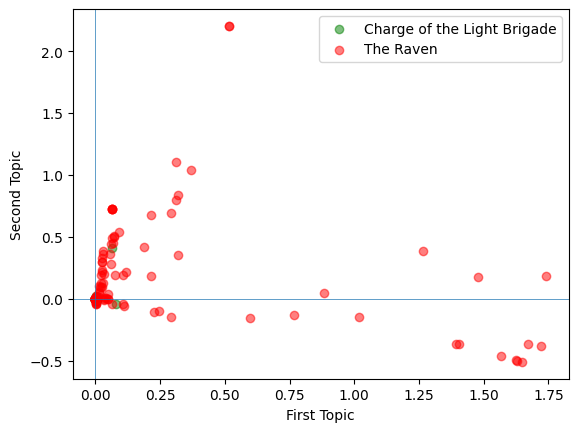

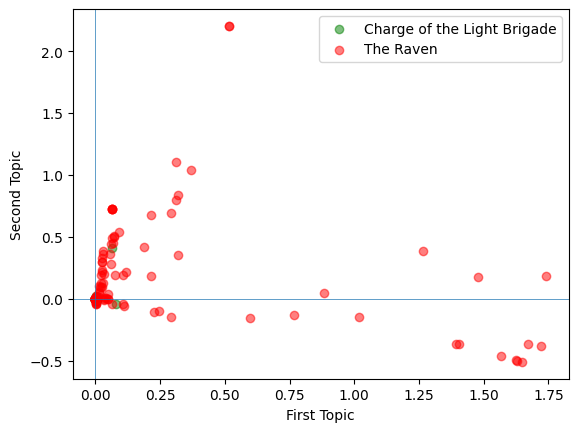

In [93]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for val in topic_encoded_df.ispoe.unique():
    topic_1= topic_encoded_df[topic_encoded_df.ispoe == val]['topic_1'].values
    topic_2= topic_encoded_df[topic_encoded_df.ispoe == val]['topic_2'].values  
    print(val)
    color = "red" if val else "green"
    label = "The Raven" if val else "Charge of the Light Brigade"
    ax.scatter(topic_1, topic_2, c=color, alpha=0.5, label=label)

ax.set_xlabel('First Topic')
ax.set_ylabel('Second Topic')
ax.axvline(linewidth=0.5)
ax.axhline(linewidth=0.5)
ax.legend()

    
display(fig)